In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
df = pd.read_csv(r'~\Box\STAT 222 Capstone\Raw Data\Earnings call from web\earning_call_web.csv')

In [3]:
print(df.shape)
print(df.columns)
df["date"] = pd.to_datetime(df["date"])

(18346, 6)
Index(['Unnamed: 0', 'symbol', 'quarter', 'year', 'date', 'content'], dtype='object')


In [4]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,symbol,quarter,year,date,content
0,BCE,4,2012,2013-02-07 17:00:00,Thane Fotopoulos: Good morning everybody. I am...
1,BCE,3,2012,2012-11-01 13:00:49,Executives: Thane Fotopoulos George Alexander ...
2,BCE,2,2012,2012-08-08 15:00:00,Executives: Thane Fotopoulos George A. Cope - ...
3,BCE,4,2013,2014-02-06 17:30:09,Executives: Thane Fotopoulos George Alexander ...
4,BCE,3,2013,2013-11-07 15:00:00,Executives: Thane Fotopoulos George Alexander ...


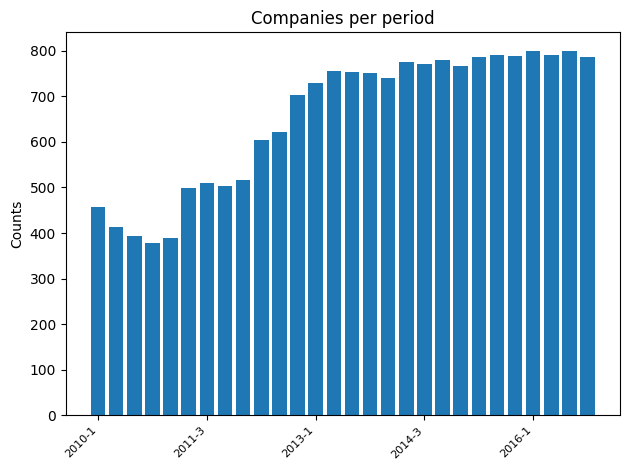

In [5]:
company_by_date = []
group_yq = df.groupby(["year", "quarter"])["symbol"].nunique().reset_index()
group_yq["period"] = group_yq['year'].astype(str) + "-" + group_yq['quarter'].astype(str)
n = 6


plt.bar(group_yq['period'].tolist(), group_yq['symbol'].tolist())
plt.title("Companies per period")
plt.ylabel('Counts')
plt.xticks([i for i in range(len(group_yq["period"])) if i % n == 0], 
           [label for i, label in enumerate(group_yq["period"]) if i % n == 0],
           rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [6]:
df.symbol.value_counts(ascending= True).head(15)

symbol
SITE    1
GWRS    1
ADSW    1
DFIN    1
FTV     1
CCU     1
PED     1
INSW    1
HZN     2
TGLS    2
INFO    2
BW      3
WBT     3
GLPG    3
EPC     3
Name: count, dtype: int64

### Date Verification

In [7]:
df.sort_values(by = "date").head()

,symbol,quarter,year,date,content
10396,NVDA,1,2010,2009-05-08 01:50:29,Executives: Michael Hara - Investor Relations ...
16593,ADSK,1,2010,2009-05-21 20:48:16,Executives: David Gennarelli - Director of Inv...
13651,LDOS,1,2010,2009-06-03 20:43:37,Executives: Stuart Davis - Senior Vice Preside...
15357,SCS,1,2010,2009-06-23 15:11:40,Executives: Raj Mehan - Director IR Jim Hacke...
7085,RAD,1,2010,2009-06-24 14:47:21,Executives: Chris Hall - Senior Vice President...


### Good Cases

In [8]:
# Good
# Company: NVDA
# Year & quarter: 2010 1
# Actual quarter: 2010 1
# Date: 2009-05-08
# Actual Date: 2009-05-08 (checked with transcripts)
print(df.iloc[10396, -1][:300])

Executives: Michael Hara - Investor Relations Jen-Hsun Huang - President, Chief Executive Officer and Director David White - Chief Financial Officer  Marvin D. Burkett - Senior Advisor
Analysts: Daniel Berenbaum - Auriga Hans Mosesmann - Raymond James Glen Yeung - Citigroup  Uche Orji - UBS  Rajvind


In [9]:
# Good
# Company: LDOS
# Year & quarter: 2015 3
# Actual quarter: 2015 3
# Date: 2014-12-03
# Actual Date: 2014-12-03 (checked on web)
print(df.iloc[13666, -1][:300])

Executives: Kelly P. Hernandez - Vice President of Investor Relations Roger A. Krone - Chief Executive Officer Mark W. Sopp - Executive Vice President and Chief Financial Officer
Analysts: Edward S. Caso - Wells Fargo Securities LLC Jason Kupferberg - Jefferies & Company, Inc. Joseph B. Nadol - J.P.


### minor mismatch in date and quarter

In [11]:
# eg. Year 2015 (transcript still match with quarter)
display(df[df.symbol == "LDOS"].sort_values(by="date"))

,symbol,quarter,year,date,content
13651,LDOS,1,2010,2009-06-03 20:43:37,Executives: Stuart Davis - Senior Vice Preside...
13650,LDOS,2,2010,2009-09-02 22:13:24,Executives: Stuart Davis - Senior Vice Preside...
13649,LDOS,3,2010,2009-12-09 00:17:07,Executives: Laura Luke – Vice President Media ...
13648,LDOS,4,2010,2010-03-30 21:52:10,Executives: Laura Luke – Vice President Media ...
13653,LDOS,1,2011,2010-06-05 04:24:08,"Executives: Laura Luke – VP, Media Relations W..."
13652,LDOS,3,2011,2010-12-08 22:58:20,"Executives: Paul Levi – Senior Vice President,..."
13657,LDOS,1,2012,2011-06-02 21:50:16,Executives: Mark Sopp - Chief Financial Office...
13656,LDOS,2,2012,2011-08-31 21:00:08,Executives: Mark Sopp - Chief Financial Office...
13655,LDOS,3,2012,2011-12-06 21:10:09,Executives: Mark W. Sopp - Chief Financial Off...
13654,LDOS,4,2012,2012-03-20 20:40:35,Executives: Paul E. Levi - Senior Vice Preside...


In [12]:
# Bad
# Company: LDOS
# Year & quarter: 2015 1
# Actual quarter: 2015 1
# Date: 2015-05-12
# Actual Date: 2014-06-04 (checked on web)
print(df.iloc[13664, -1][:300])

Executives: Kelly P. Hernandez - Vice President, Investor Relations Roger A. Krone - Chief Executive Officer Mark W. Sopp - Chief Financial Officer & Executive Vice President Lou Von Thaer - President, National Security Sector, Leidos Holdings, Inc.
Analysts: Cai von Rumohr - Cowen & Co. LLC Edward 


### Discrepancy in Year & Quarter

In [15]:
df.describe()

,Unnamed: 0,quarter,year,date
count,18346.000000,18346.000000,18346.000000,18346
mean,9172.500000,2.523874,2013.418947,2014-01-20 02:04:28.998201344
min,0.000000,1.000000,2010.000000,2009-05-08 01:50:29
25%,4586.250000,2.000000,2012.000000,2012-07-31 16:35:32.249999872
50%,9172.500000,3.000000,2014.000000,2014-03-02 14:40:03
75%,13758.750000,4.000000,2015.000000,2015-08-09 00:36:58.500000
max,18345.000000,4.000000,2016.000000,2017-05-23 22:23:05
std,5296.178355,1.113657,1.893340,NaN


In [16]:
def match_date(year, quarter):
    # Assign 1st quarter to Feb, 2nd to May, 3rd to Aug, 4th to Nov
    month = (quarter-1)*3 + 2
    matched_date = f"{year}-{month:02d}-01"
    return matched_date

matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation = df.date - matched_date
deviation.describe()

count                         18346
mean     62 days 08:19:07.315000545
std      75 days 12:32:31.718200896
min             -274 days +21:19:00
25%         80 days 13:31:37.500000
50%                88 days 21:30:37
75%         96 days 13:50:10.500000
max               453 days 17:00:00
dtype: object

In [57]:
df[deviation>timedelta(days=360)]

,Unnamed: 0,symbol,quarter,year,date,content
4832,4832,JCI,2,2011,2012-04-26 15:27:03,Executives: Ed Breen - Chairman & Chief Execut...
13928,13928,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
15470,15470,SGMS,1,2016,2017-04-28 17:00:00,Operator: Good day everyone and welcome to the...


In [13]:
# Company: MANT
# Year & quarter: 2014 1
# Actual quarter: 2015 1 (checked in transcritpt)
# Date: 2015-04-30
# Actual Date: 2015-04-30 (checked on web)
print(df.iloc[13928, -1][:300])

Operator: Good day, ladies and gentlemen and welcome to the ManTech International Corp. First Quarter Fiscal Year 2015 Conference Call. At this time all participants are in a listen-only mode. Later, we will conduct a question-and-answer session, and instructions will follow at that time. [Operator 


In [14]:
# discrepancy in year
display(df.iloc[13926:13939, ].sort_values(by = "date"))

,symbol,quarter,year,date,content
13927,MANT,1,2013,2013-05-02 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13926,MANT,2,2013,2013-08-01 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13931,MANT,2,2014,2014-07-31 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13930,MANT,3,2014,2014-10-30 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13929,MANT,4,2014,2015-02-19 17:00:00,"Operator: Good day, ladies and gentlemen. And ..."
13928,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
13934,MANT,2,2015,2015-07-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
13933,MANT,3,2015,2015-10-29 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13932,MANT,4,2015,2016-02-18 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13938,MANT,1,2016,2016-04-28 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."


In [15]:
# Company: JCI
# Year & quarter: 2011 2
# Actual quarter: 2012 2
# Date: 2012-04-26
# Actual Date: 2012-04-20 (checked on Web)
print(df.iloc[4832, -1][:300])

Executives: Ed Breen - Chairman & Chief Executive Officer  Frank Sklarsky - Chief Financial Officer  Patrick Decker - President of Flow Control Naren Gursahaney - President of Tyco Security Solutions George Oliver - President of Tyco Fire Protection Antonella Franzen - Vice President of Investor Rel


In [16]:
# Company: SGMS
# Year & quarter: 2016 1
# Actual quarter: 2017 1
# Date: 2017-04-28
# Actual Date: 2017-04-27
print(df.iloc[15470, -1][:300])

Operator: Good day everyone and welcome to the Scientific Games First Quarter 2017 Investor Conference Call. All participants will be in a listen-only mode. [Operator Instructions] After today's presentation, there will be an opportunity to ask questions. [Operator Instructions] Please also note, th


### Old data

In [17]:
# Load the data
df_old = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Calls\calls_short.csv')
df_old.rename(columns={"transcript":"content", "company": "symbol"}, inplace = True)
df_old = df_old.drop("sector", axis = 1)

In [18]:
df_old["Source"] = "kaggle"
df["Source"] = "web"
print(df_old.columns)
print(df.columns)

Index(['symbol', 'year', 'quarter', 'date', 'content', 'Source'], dtype='object')
Index(['symbol', 'quarter', 'year', 'date', 'content', 'Source'], dtype='object')


In [19]:
df = df[df_old.columns]
df_full = pd.concat([df_old, df], axis = 0)

In [20]:
print(df_old.shape)
print(df.shape)
print(df_full.shape)

(24580, 6)
(18346, 6)
(42926, 6)


In [21]:
df_full.symbol.nunique()

1725

In [22]:
df_full.duplicated(subset=['symbol', 'year', 'quarter']).sum()

9987

In [23]:
df_full.drop_duplicates(subset = ['symbol', 'year', 'quarter'], keep = "last", inplace = True)

In [24]:
df_full.shape

(32939, 6)

In [25]:
# 18 companies has less than 2 earnings calls in the data
print((df_full.symbol.value_counts(ascending=True)<2).sum())

# 1725 unique companies
print(df_full.symbol.nunique())

18
1725


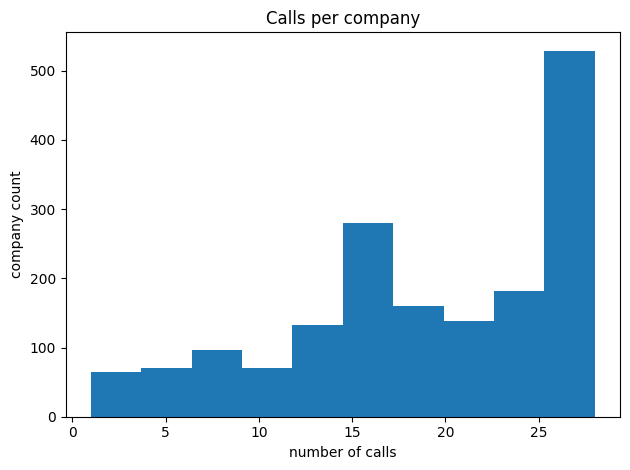

In [26]:
plt.hist(df_full.symbol.value_counts())
plt.title("Calls per company")
plt.ylabel('company count')
plt.xlabel("number of calls")
plt.tight_layout()
plt.show()

## Distribution of mismatch in date

In [27]:
def match_date(year, quarter):
    # Assign 1st quarter to Jan, 2nd to Apr, 3rd to July, 4th to Oct
    month = (quarter-1)*3 + 1
    matched_date = f"{year}-{month:02d}-01"
    matched_date = pd.to_datetime(matched_date)
    return matched_date

# New calls from web
matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
deviation_web = df.date - matched_date
deviation_web.describe()

count                         18346
mean     93 days 02:16:15.419219448
std      75 days 12:45:11.610805412
min             -243 days +21:19:00
25%        110 days 23:10:31.250000
50%               119 days 17:00:00
75%        126 days 21:59:46.250000
max               484 days 17:00:00
dtype: object

In [28]:
# Old calls from kaggle
matched_date = df_old.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation_old = pd.to_datetime(df_old.date) - matched_date
deviation_old.describe()

count                           24580
mean     -67 days +04:11:30.122050448
std       285 days 15:53:18.835013400
min              -3047 days +00:00:00
25%                -68 days +00:00:00
50%                  26 days 00:00:00
75%                  47 days 00:00:00
max                 225 days 00:00:00
dtype: object

In [29]:
pd.to_datetime("2020-01-01") - pd.to_datetime("2020-04-01")

Timedelta('-91 days +00:00:00')

In [30]:
deviation_web.dt.days.head()

0    129
1    123
2    129
3    128
4    129
dtype: int64

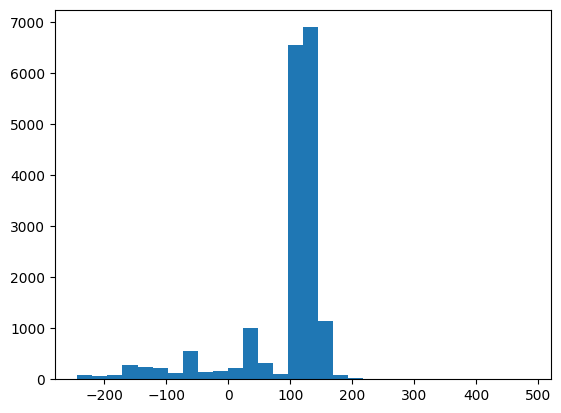

In [31]:
# positive means days after Jan-01 for earnings calls
plt.hist(deviation_web.dt.days, bins = 30);

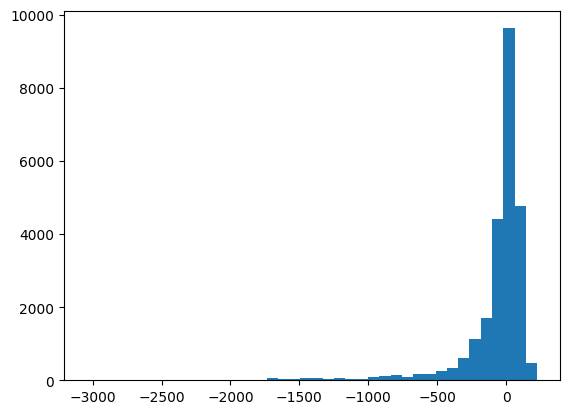

In [32]:
plt.hist(deviation_old.dt.days, bins = 40);

In [34]:
df_old.iloc[2131, -2][:300]

'Operator: Good day, ladies and gentlemen, and welcome to the Zions Bancorporation Fourth Quarter Earnings Call. [Operator Instructions] I would now like to turn the conference over to your host, James Abbott.\nJames Abbott: Thanks, John, and good evening. We welcome you to this conference call to dis'

In [35]:
df_old.iloc[23878, -2][:300]

"Operator: Good day, ladies and gentlemen. Thank you for standing by. Welcome to Best Buy's Conference Call for the Fourth Quarter of Fiscal 2011. [Operator Instructions] I would now like to turn the conference call over to Mr. Bill Seymour, Vice President of Investor Relations. Please go ahead, sir."

In [36]:
df.iloc[3218, -2][:300]

'Executives: Lynne Maxeiner - Director of IR David Farr - Chairman of the Board, Chief Executive Officer, President and Chairman of Executive Committee\nAnalysts: Richard Kwas - Wells Fargo Securities, LLC Scott Davis - Morgan Stanley John Inch - BofA Merrill Lynch Terry Darling - Goldman Sachs Group '

In [37]:
df.iloc[3847, -2][:300]

'Executives: Matt Cribbins – Vice President-Investor Communications Jeff Immelt – Chairman and Chief Executive Officer Keith Sherin – Vice Chairman and Chief Executive Officer-GE Capital Jeff Bornstein – Chief Financial Officer\nAnalysts: Scott Davis – Barclays Deane Dray – RBC Capital Markets Steven '

In [39]:
df.iloc[4857, -2][:300]

'Executives: Louise Mehrotra – Vice President, Investor Relations Sheri McCoy - Worldwide Chairman, Pharmaceuticals Group Dominic Caruso – Vice President, Finance and Chief Financial Officer\nAnalysts: Christine [No other identification.] Michael Weinstein – JP Morgan Chase & Co. Sara Michelmore - Cow'

In [43]:
print(df_old.iloc[324, -2][-500:])

 Our focus is on improving the performance, continuing to improve the performance of the company. And as we look at it, as we said that will see the year unfold with greater improvements towards the second half not only due to market improvements but also due to some programs that we will have kick in then. So with that I would like to thank you all for joining us.
Operator: Thank you for your participation in today’s conference. This concludes the presentation. You may now disconnect. Good day.


In [45]:
print(df_old.iloc[23249, -2][-500:])

wo people with a different perspective than as the previous one. The previous caller suggested financial expertise and our real estate expertise and bringing some of the financial or retail expertise. So ultimately I’m sure at some point there will be a rotation right now I’m more focused on the additions and bringing in a different perspective. End of Q&A
Operator: This concludes our Q&A session and the conference as a whole. Thank you for attending today’s presentation. You may now disconnect.


In [46]:
print(df.iloc[3429, -2][-500:])

Officer: All right. Thank you.
Operator: At this time, I'll turn it back over to our speakers for any additional or closing remarks.
Philip P. Conti - Senior Vice President and Chief Financial Officer: Thank you, Jennifer. As Steve mentioned, we will be posting a new analyst presentation to our website later today, so that will be available some time after 4:00. And I'd like to thank you all for participating.
Operator: And that does conclude today's conference. Thank you for your participation.


In [47]:
print(df.iloc[3399, -2][-500:])

uth Florida will trade at 4.5% to 5.5% cap rates today. And as demonstrated by some of the product we've been selling, so the older garden product stuff is probably close to 6%.
Operator: And at this time, we have no further questions in the phone queue.
David J. Neithercut: All right. Thank you. I appreciative everybody's time today. We look forward to seeing many of you in Atlanta next week. Have a great day.
Operator: This does conclude today's conference. We thank you for your participation.
